#Importing necessary libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler # creating duplicate values of the less column values
from sklearn.preprocessing import StandardScaler #scale the values by average value and mean value
#neural network
import tensorflow as tf
#classification report
from sklearn.metrics import classification_report

# Reading Dataset

In [2]:
columns_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names =columns_names)

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

#Finding classification calsses

In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == 'g').astype(int)
df["class"].unique()

array([1, 0])

#Ploting histogram of each class

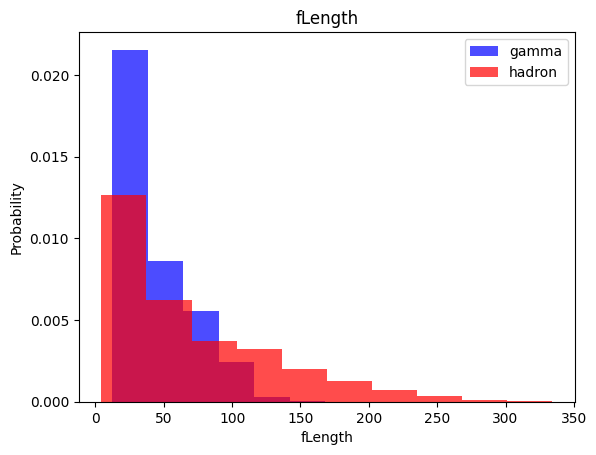

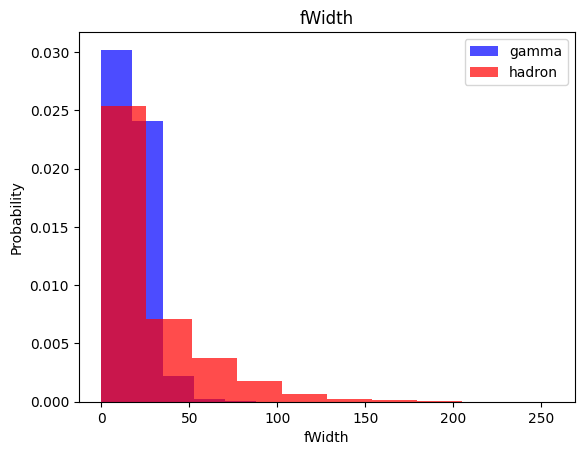

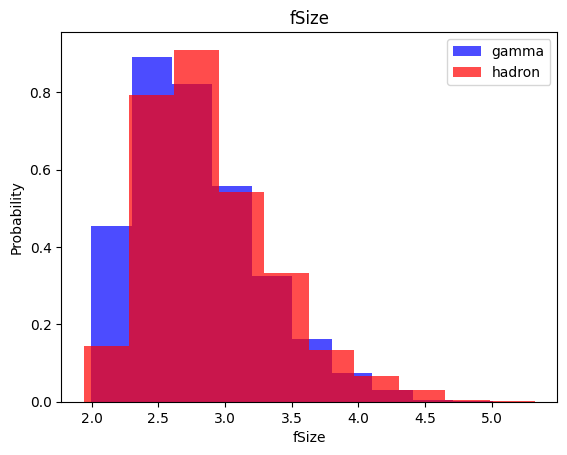

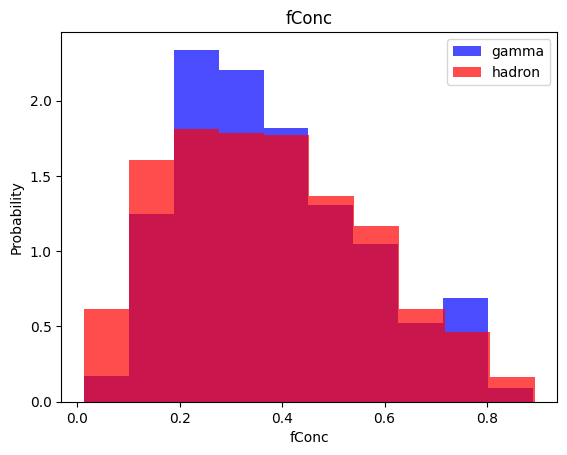

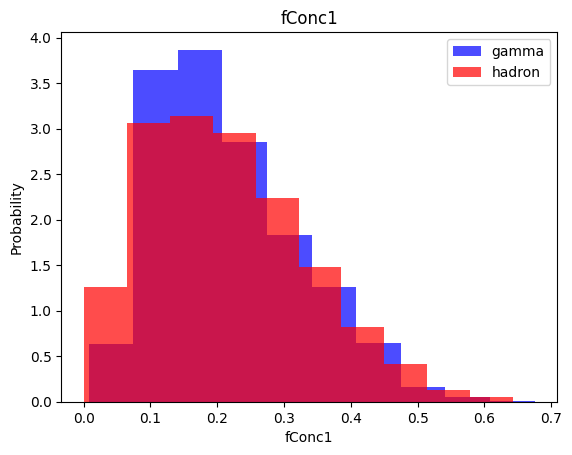

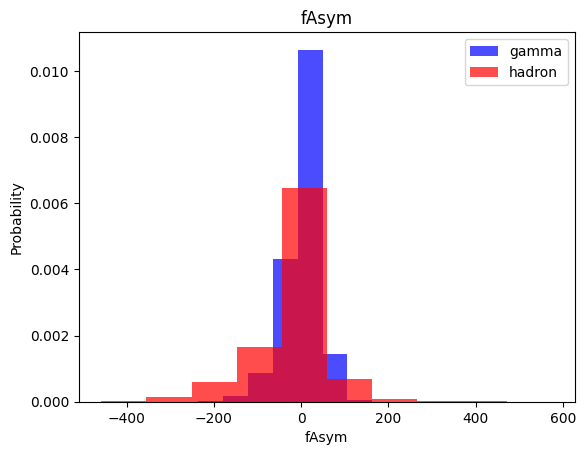

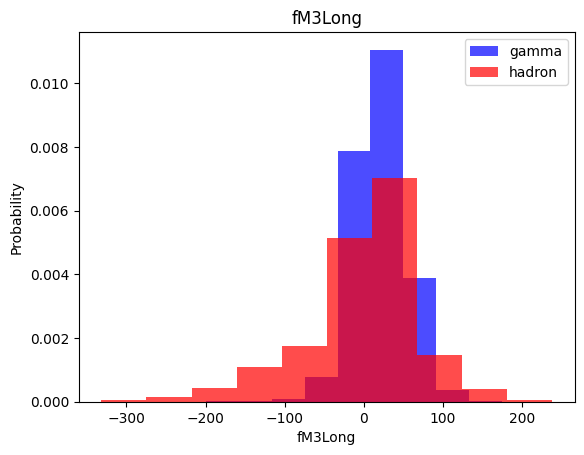

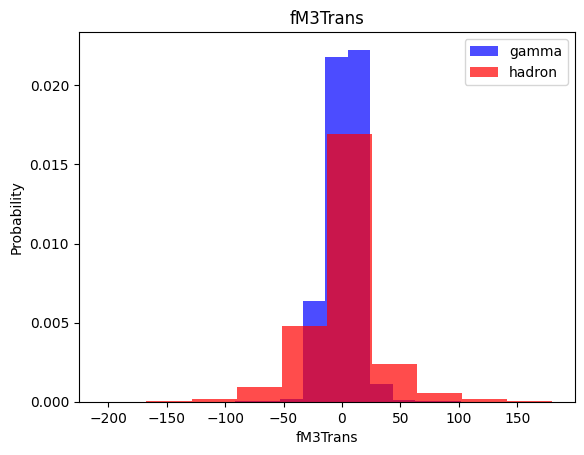

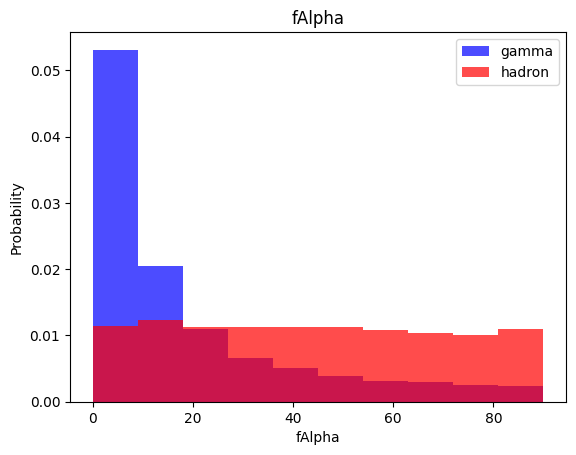

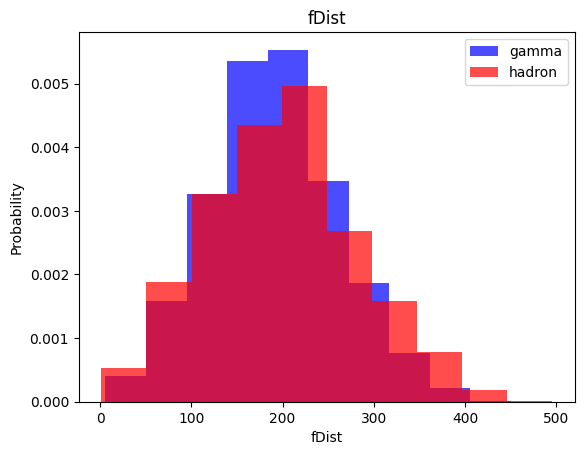

In [5]:
for label in columns_names[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", alpha=0.7, label = "gamma", density = True)
  plt.hist(df[df["class"] == 0][label], color="red", alpha=0.7, label = "hadron", density = True)

  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Spliting data into rain, val, and test

In [6]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
print(train.head())
print(val.head())
print(test.head())

        fLength    fWidth   fSize   fConc  fConc1    fAsym   fM3Long  \
14557  127.7040  101.0160  3.6960  0.1625  0.0835  -4.4848 -101.3540   
10690   19.1447   16.7617  2.5172  0.4438  0.2295   5.6604  -10.0808   
7730    87.5279   23.7462  3.4542  0.2164  0.1281 -43.0710   63.8345   
3896    19.8080   16.5781  2.6503  0.4318  0.2383  -8.5739  -11.6572   
6390    91.5673   17.3431  2.6439  0.3178  0.1827 -61.8638 -100.6710   

       fM3Trans   fAlpha    fDist  class  
14557   59.1181  50.4247  367.082      0  
10690   11.5903  24.6315  165.353      1  
7730     6.8093   2.6170  296.422      1  
3896     9.0275  38.7226  192.469      1  
6390    14.4790   2.9470  164.785      1  
       fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
18170  48.5150  19.5526  2.5966  0.3975  0.2063  29.7594  53.2903   12.3180   
5593   34.6563  21.1375  2.9112  0.2896  0.1528  43.2204  29.9303  -12.6807   
6787   69.4357  13.3956  2.5563  0.3583  0.1986  85.3984  27.1742    5.1

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Scaling dataset

In [7]:
def scale_dataset(dataframe, over_sample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if over_sample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [8]:
train, x_train, y_train = scale_dataset(train, over_sample = True)
val, x_val, y_val = scale_dataset(val, over_sample = False)
test, x_test, y_test = scale_dataset(test, over_sample = False)

#Ploting loss and accuracy

In [30]:
def plot_loss(history):
  plt.plot(history.history["loss"], label="loss")
  plt.plot(history.history["val_loss"], label="val_loss")
  plt.xlabel("Epochs")
  plt.ylabel("Binary crossentropy")
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history["accuracy"], label="accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

#Neural network

In [31]:
def train_model(x_train, y_train, num_nodes, dropout_probs, learning_rate, epochs, batch_size):
  neural_network = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_probs),
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_probs),
      tf.keras.layers.Dense(1, activation="sigmoid"),
  ])
  neural_network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss="binary_crossentropy", metrics=["accuracy"])
  history = neural_network.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return neural_network, history

Finding best parameters

16 nodes, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


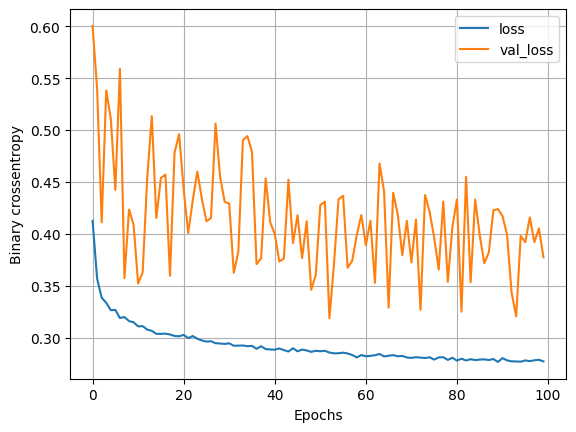

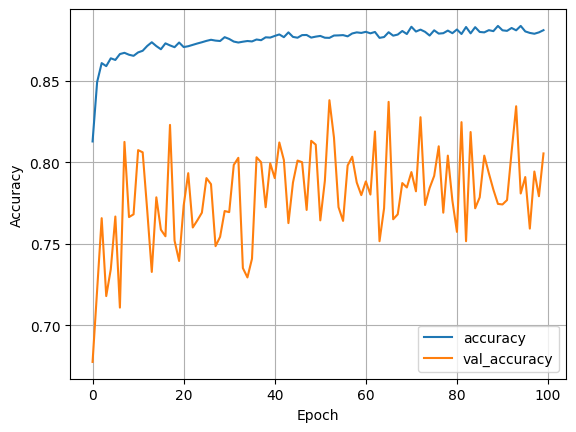

16 nodes, dropout 0, lr 0.01, batch size 64


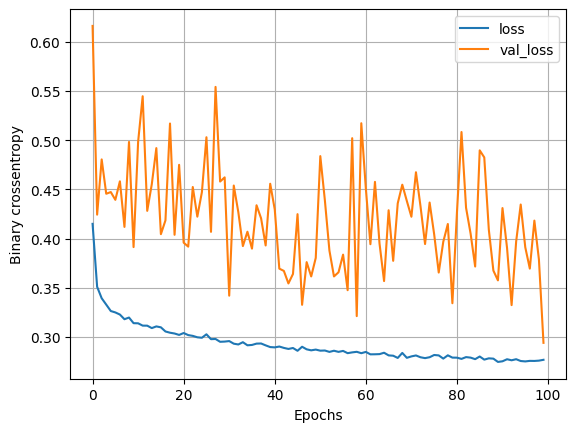

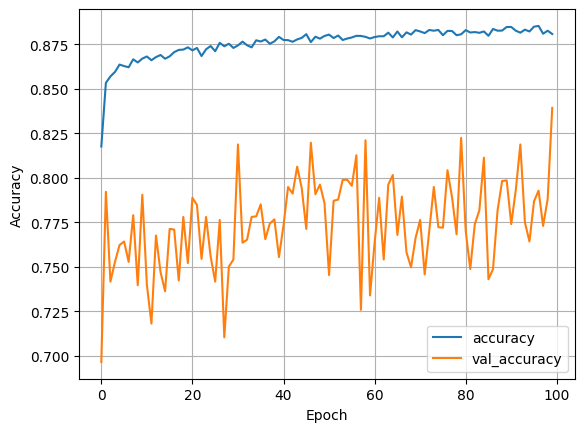

16 nodes, dropout 0, lr 0.01, batch size 128


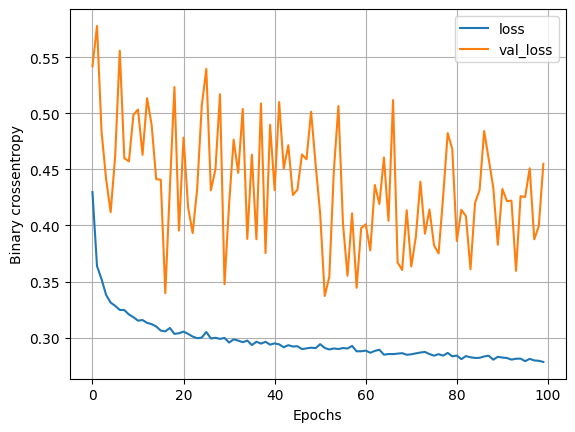

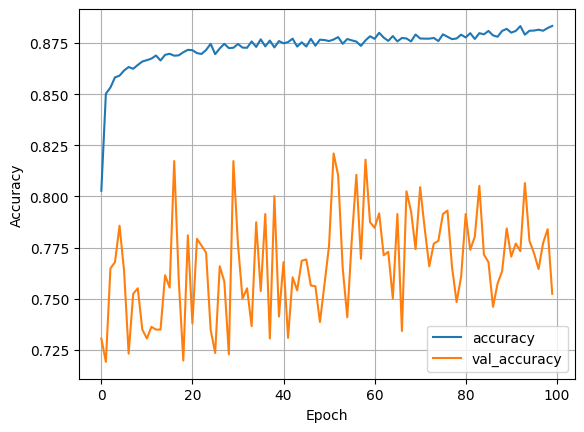

16 nodes, dropout 0, lr 0.005, batch size 32


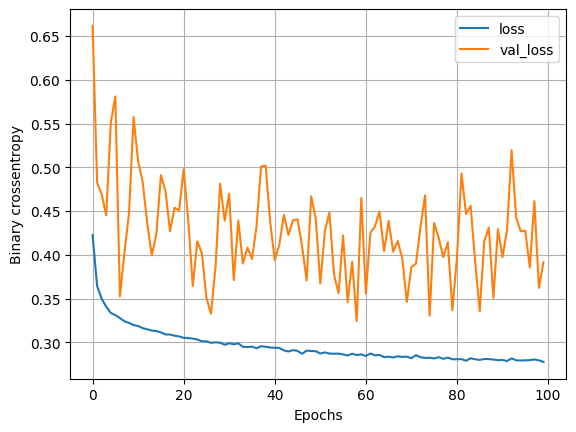

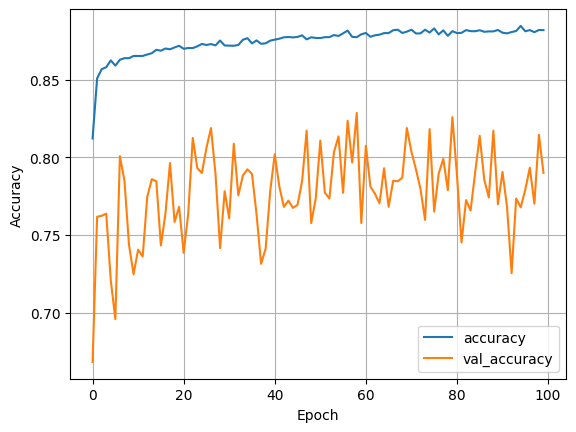

16 nodes, dropout 0, lr 0.005, batch size 64


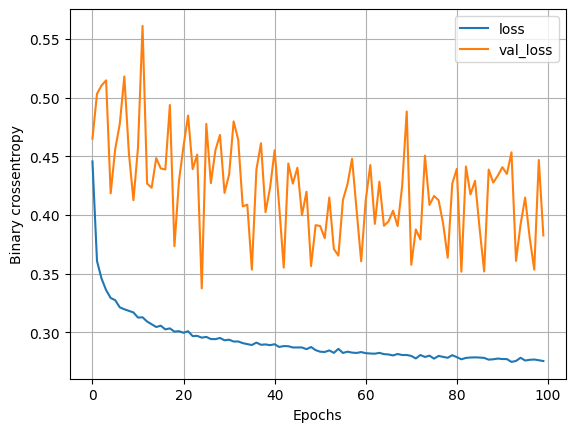

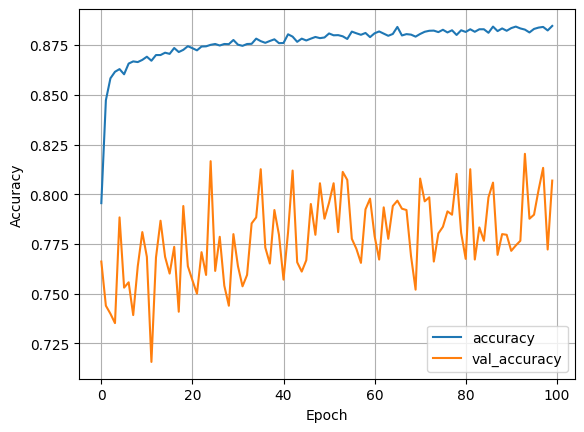

16 nodes, dropout 0, lr 0.005, batch size 128


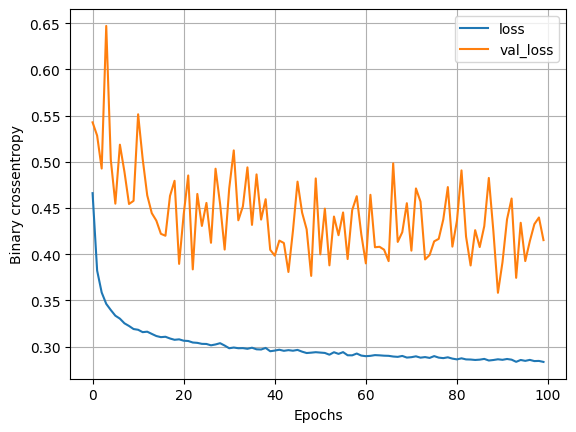

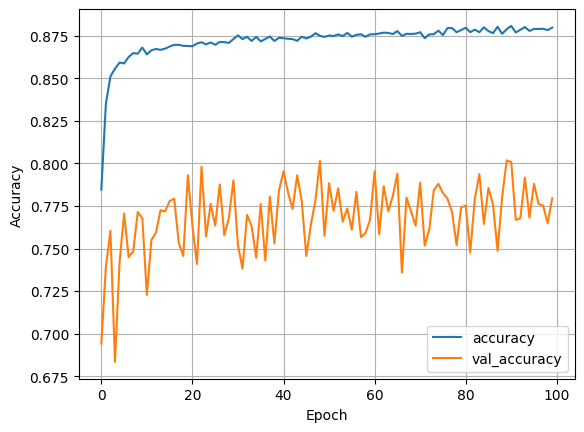

16 nodes, dropout 0, lr 0.001, batch size 32


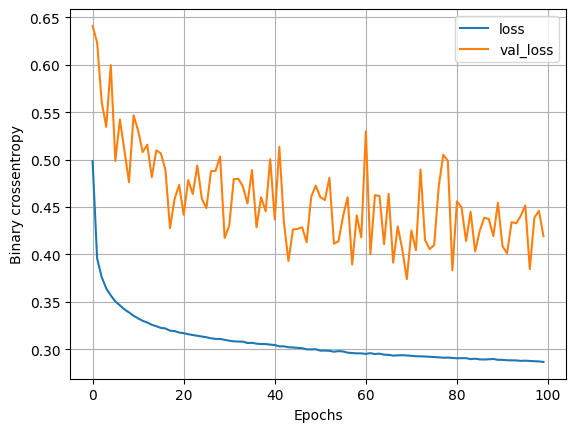

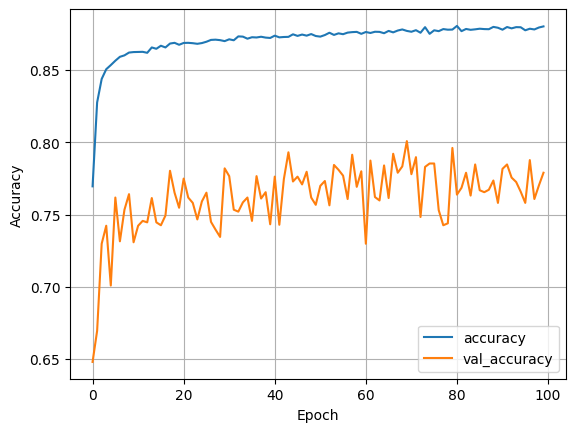

16 nodes, dropout 0, lr 0.001, batch size 64


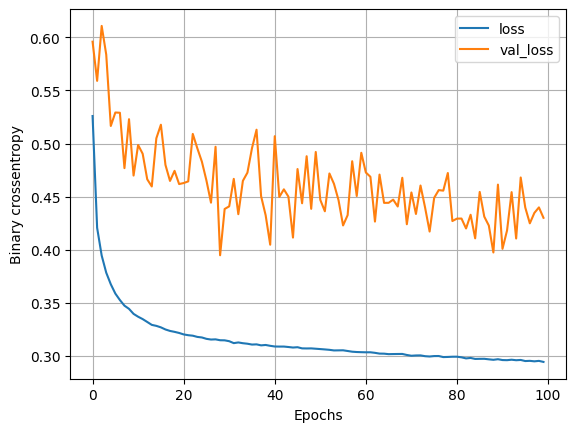

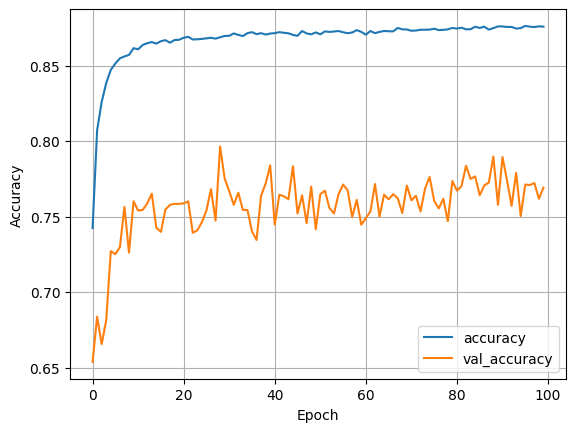

16 nodes, dropout 0, lr 0.001, batch size 128


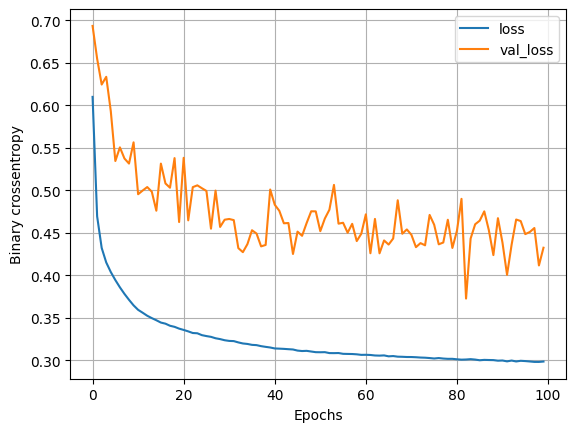

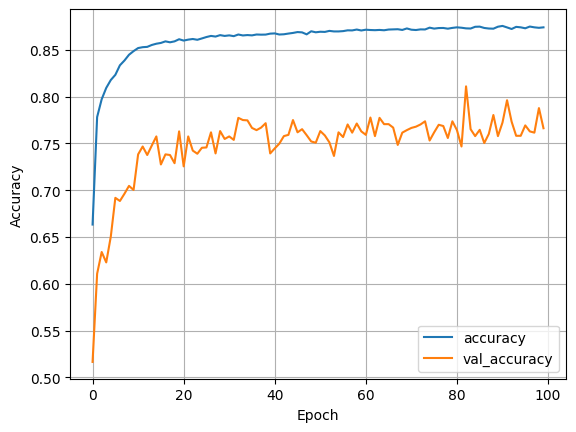

16 nodes, dropout 0.2, lr 0.01, batch size 32


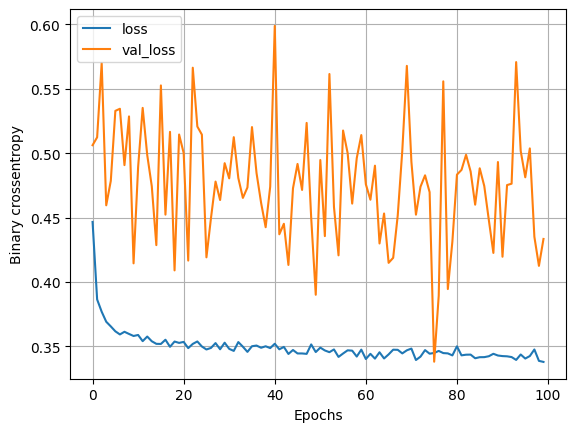

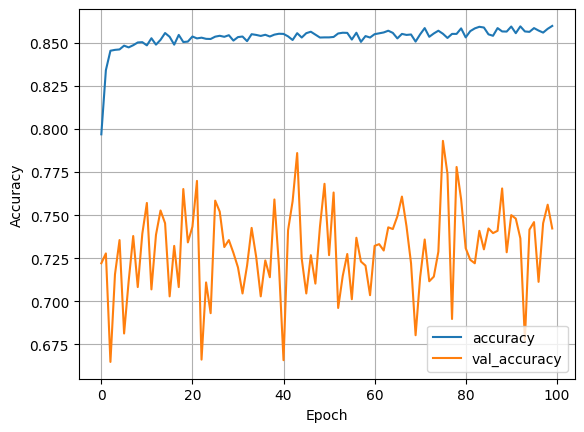

16 nodes, dropout 0.2, lr 0.01, batch size 64


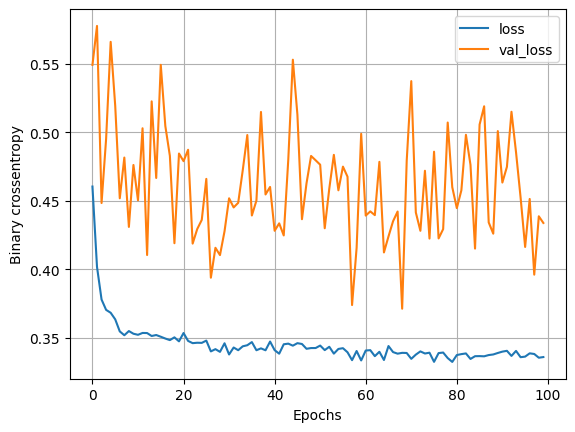

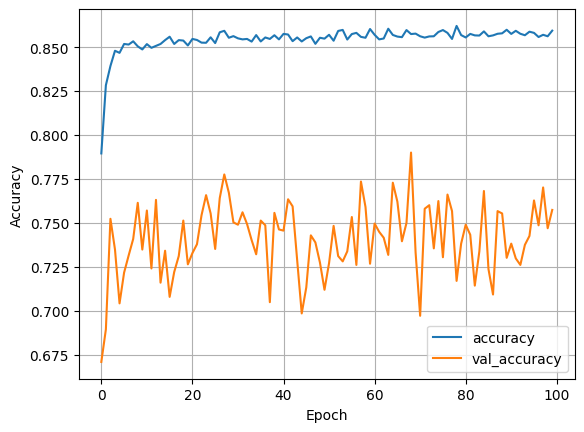

16 nodes, dropout 0.2, lr 0.01, batch size 128


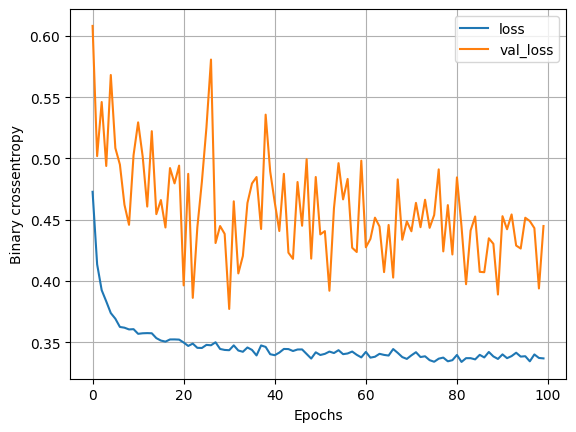

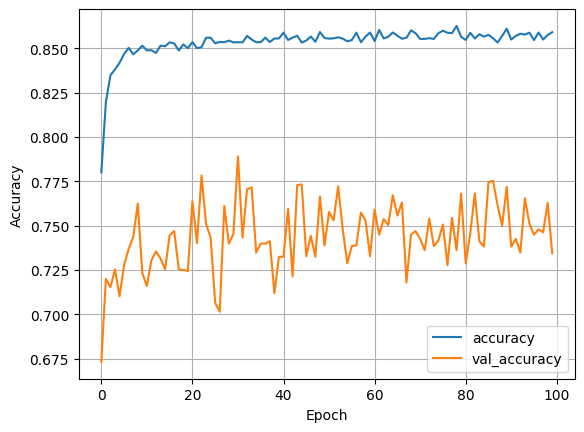

16 nodes, dropout 0.2, lr 0.005, batch size 32


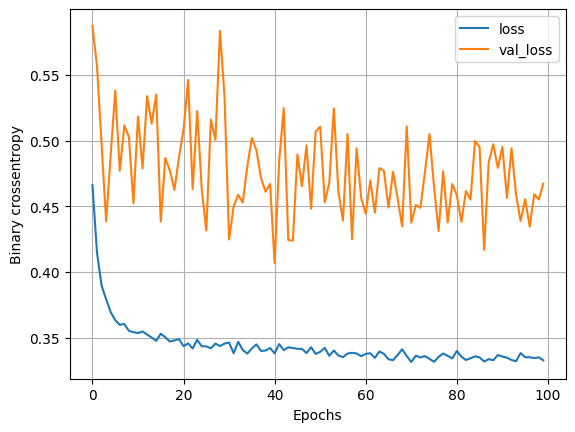

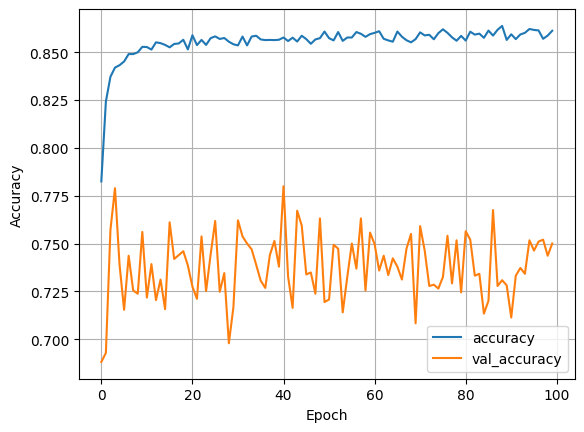

16 nodes, dropout 0.2, lr 0.005, batch size 64


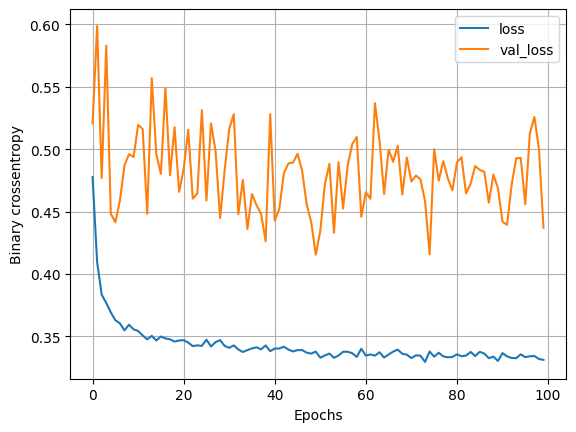

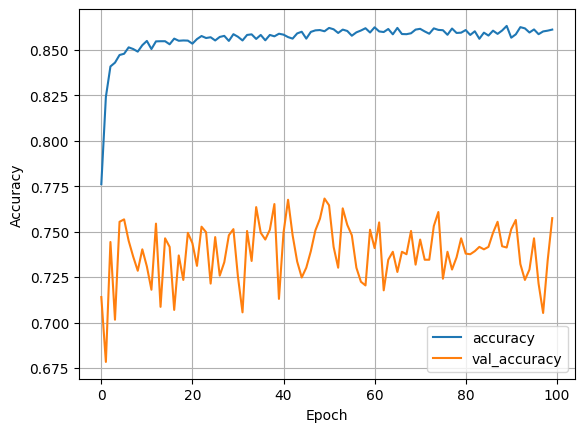

16 nodes, dropout 0.2, lr 0.005, batch size 128


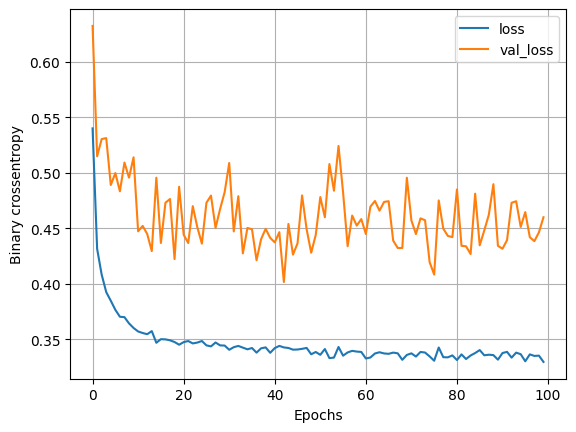

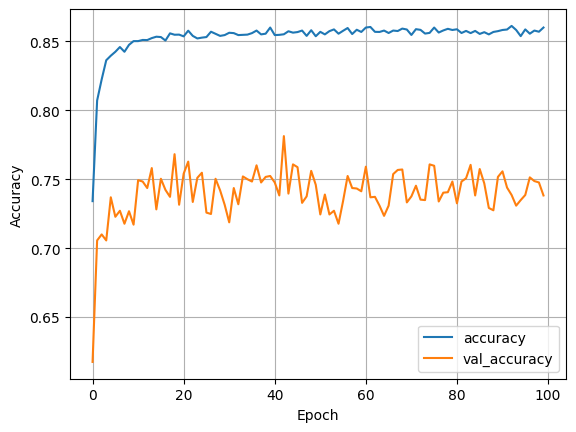

16 nodes, dropout 0.2, lr 0.001, batch size 32


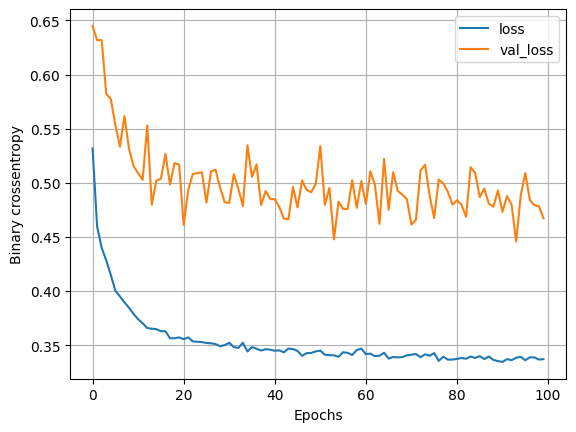

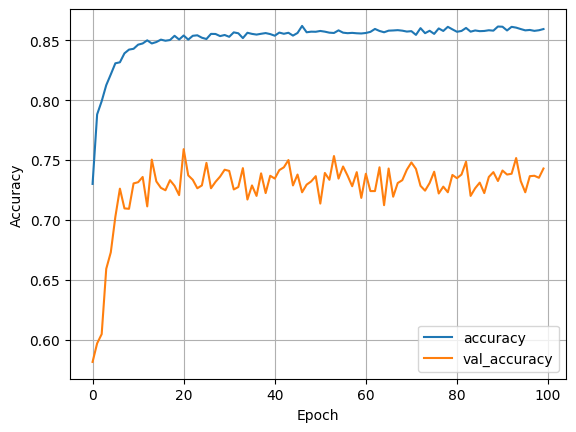

16 nodes, dropout 0.2, lr 0.001, batch size 64


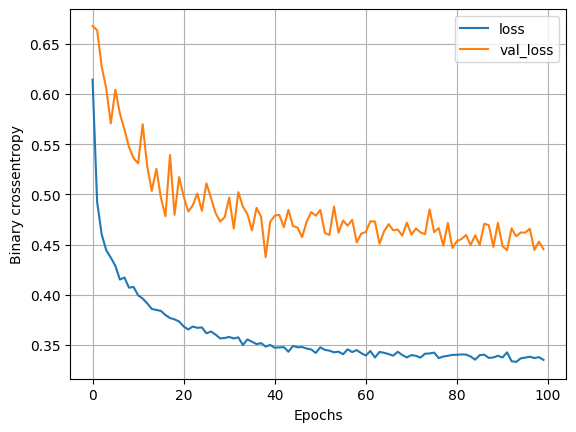

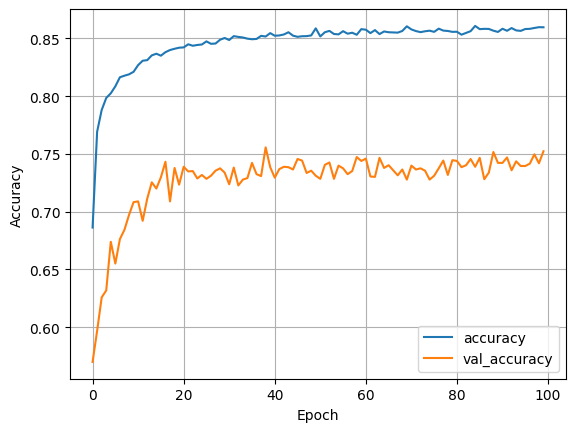

16 nodes, dropout 0.2, lr 0.001, batch size 128


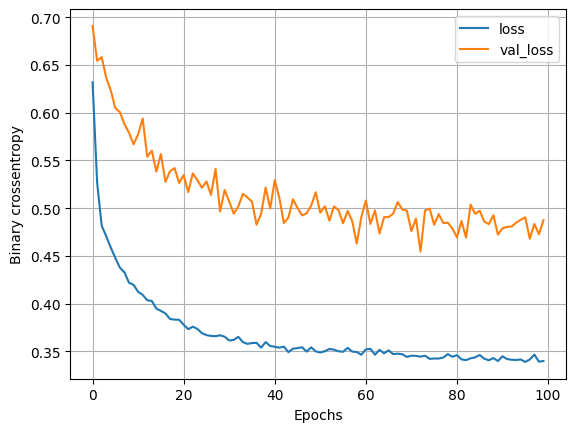

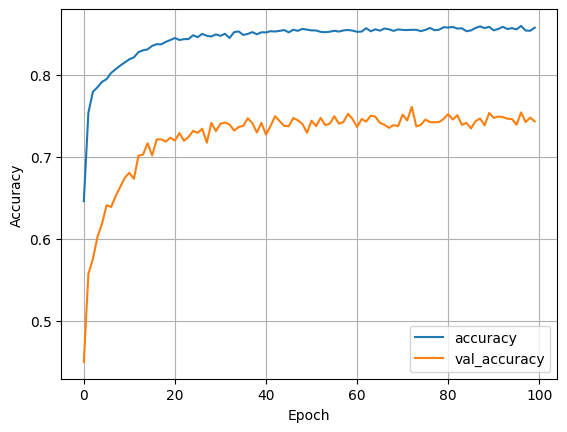

32 nodes, dropout 0, lr 0.01, batch size 32


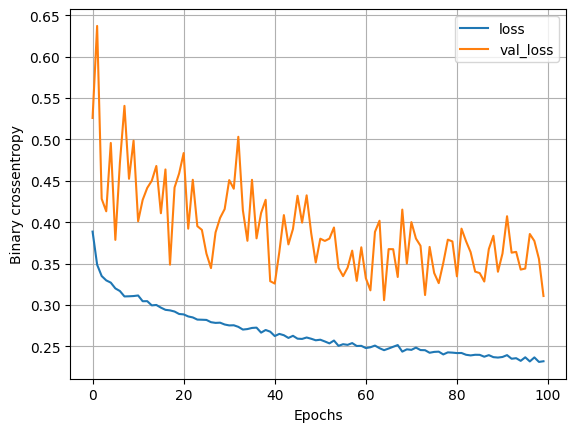

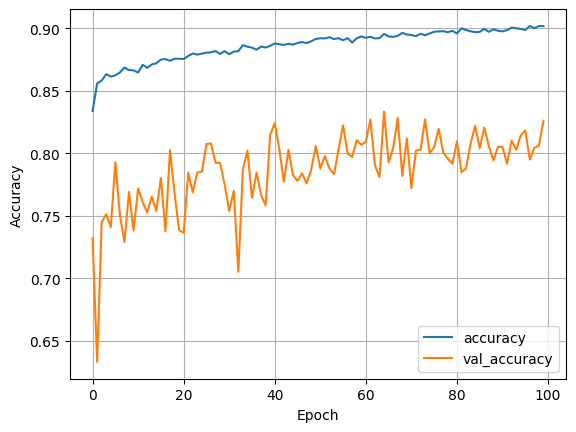

32 nodes, dropout 0, lr 0.01, batch size 64


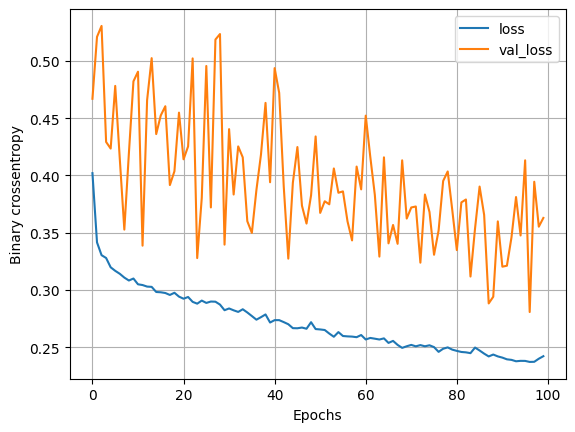

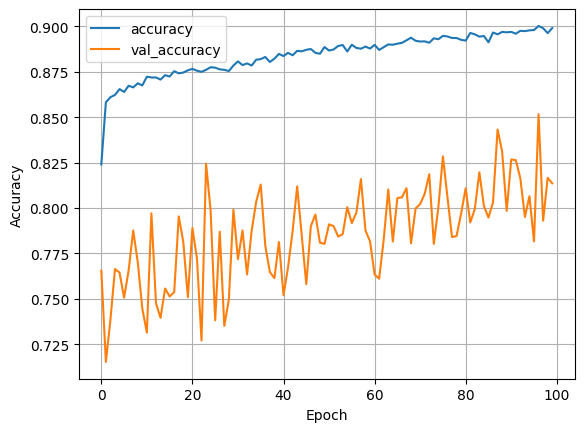

32 nodes, dropout 0, lr 0.01, batch size 128


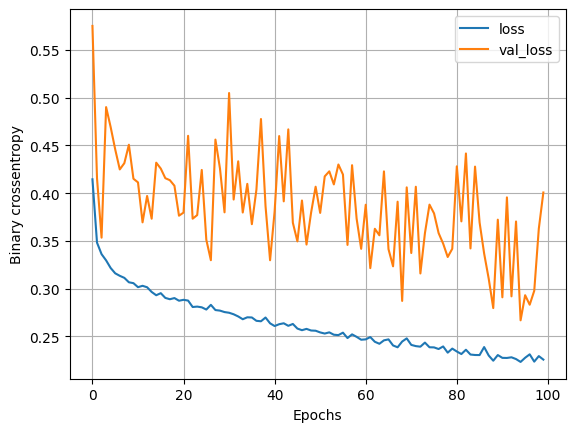

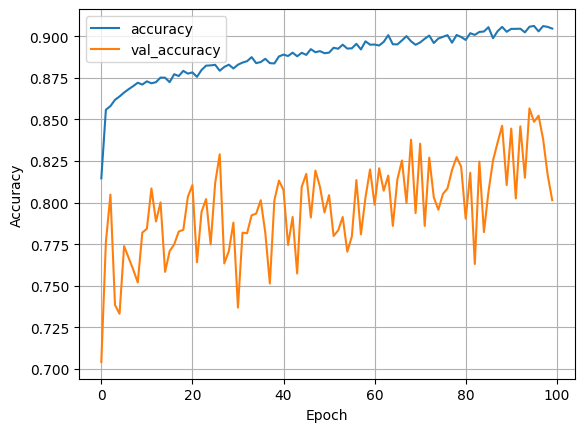

32 nodes, dropout 0, lr 0.005, batch size 32


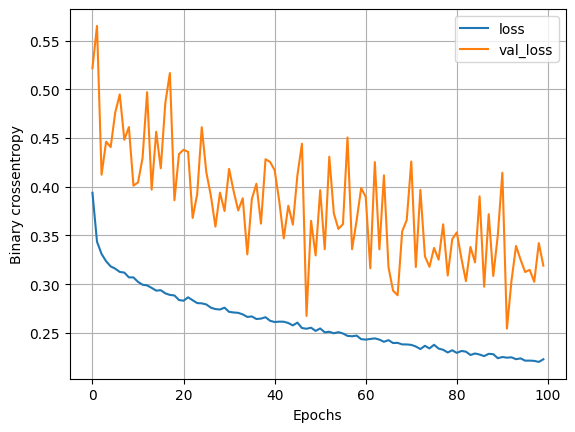

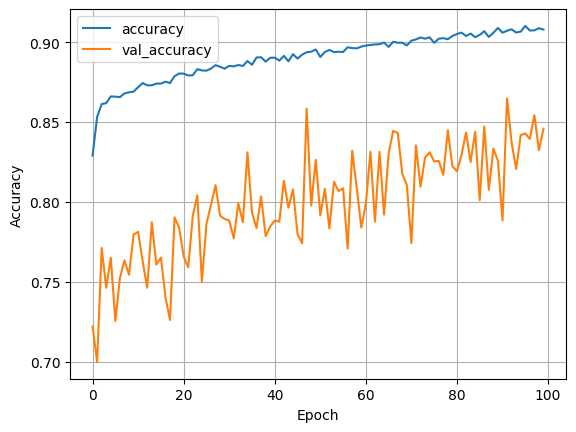

32 nodes, dropout 0, lr 0.005, batch size 64


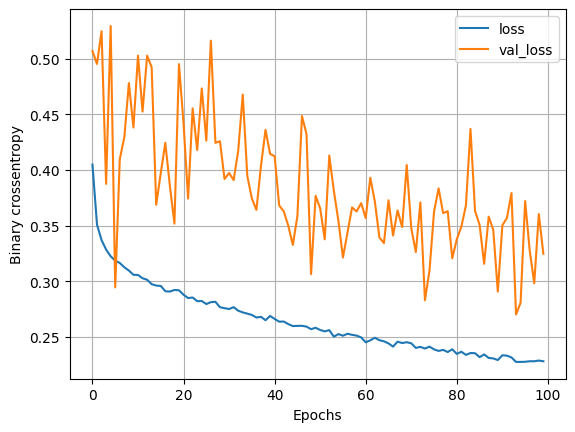

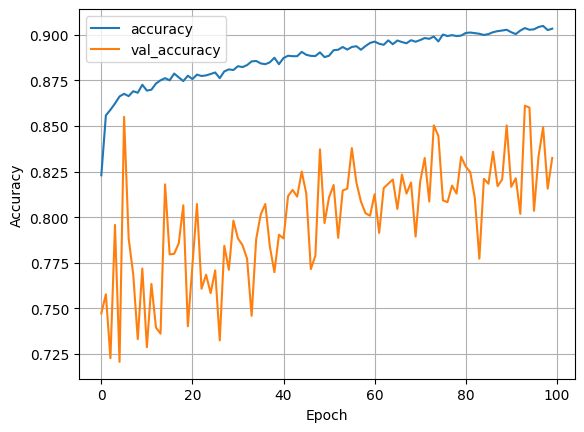

32 nodes, dropout 0, lr 0.005, batch size 128


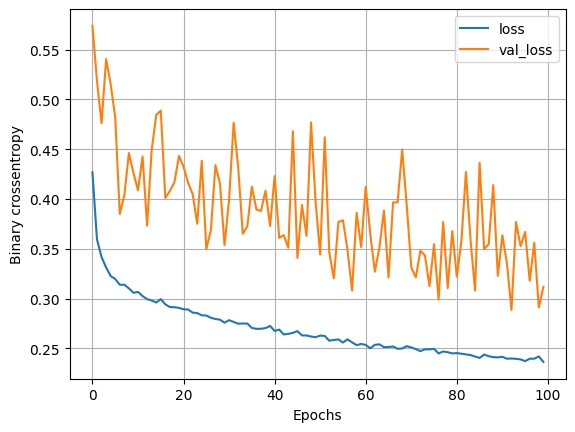

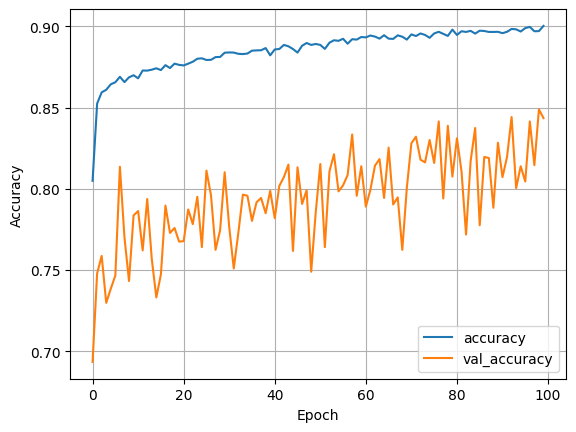

32 nodes, dropout 0, lr 0.001, batch size 32


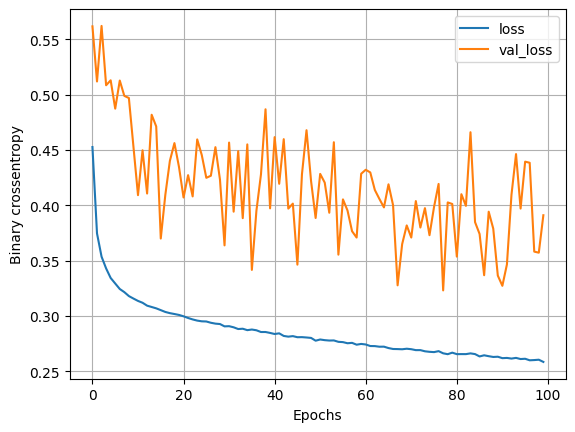

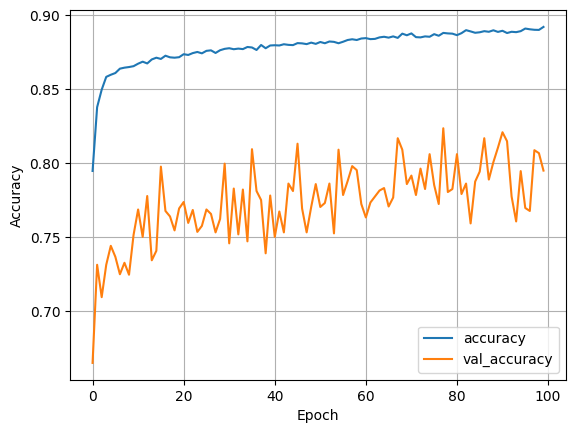

32 nodes, dropout 0, lr 0.001, batch size 64


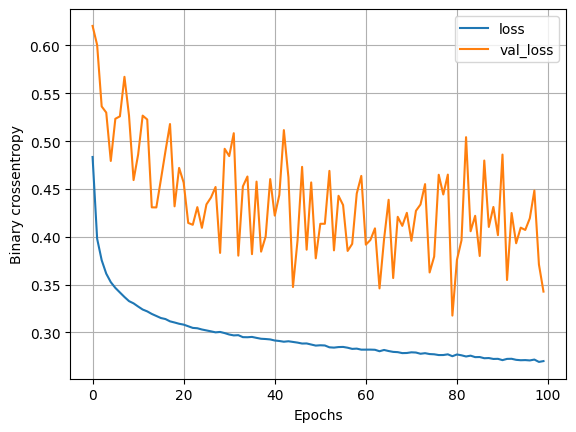

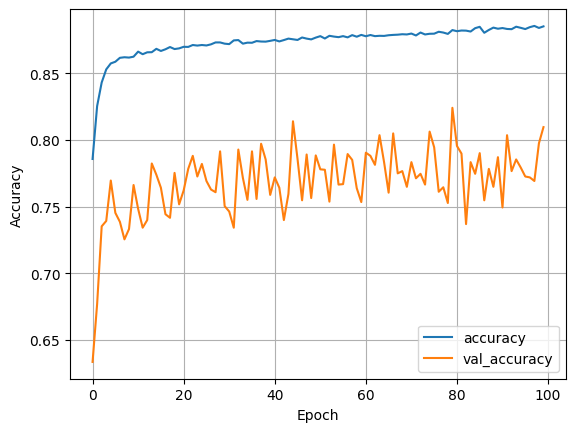

32 nodes, dropout 0, lr 0.001, batch size 128


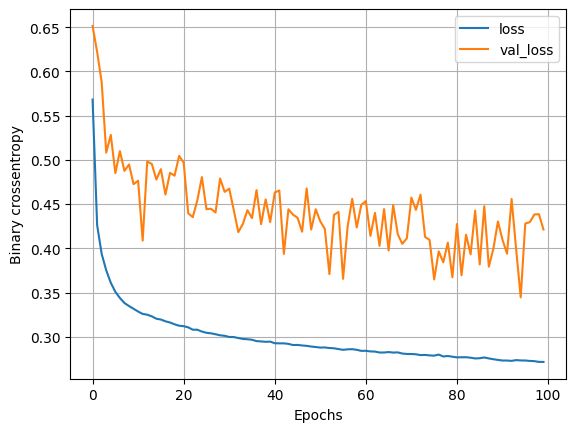

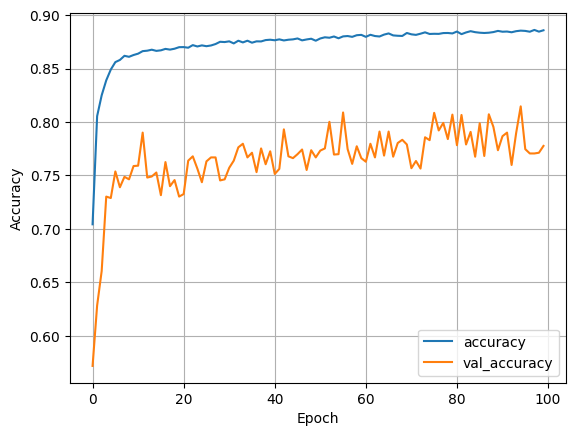

32 nodes, dropout 0.2, lr 0.01, batch size 32


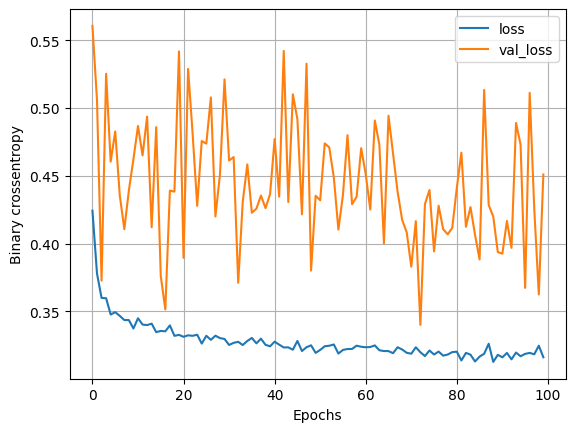

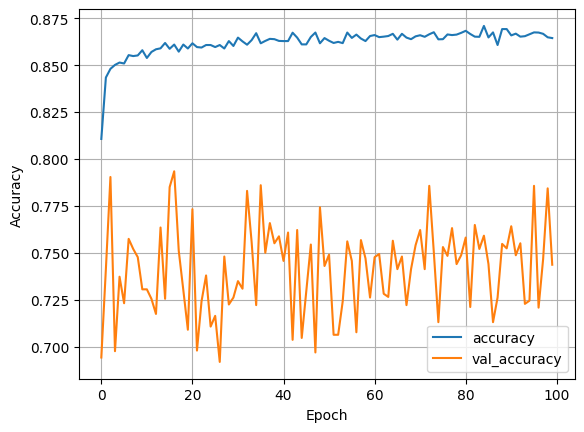

32 nodes, dropout 0.2, lr 0.01, batch size 64


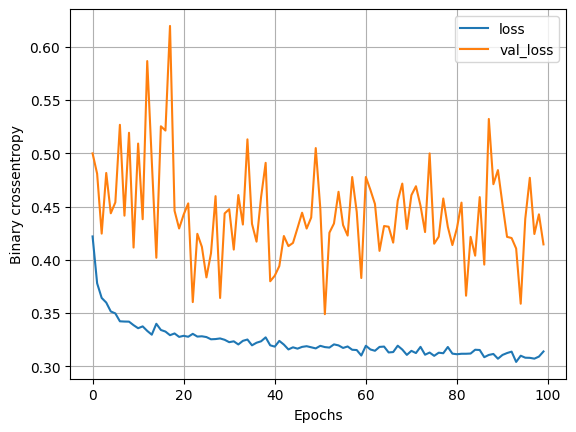

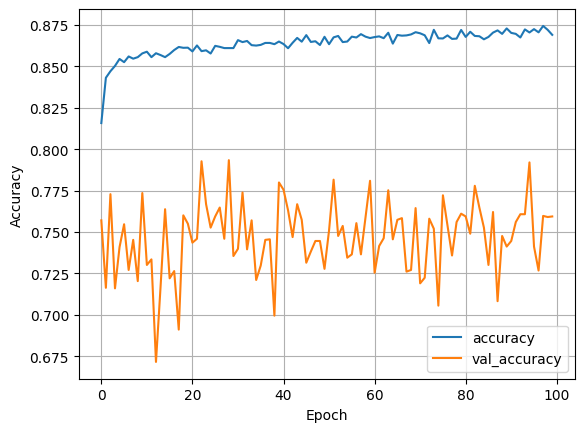

32 nodes, dropout 0.2, lr 0.01, batch size 128


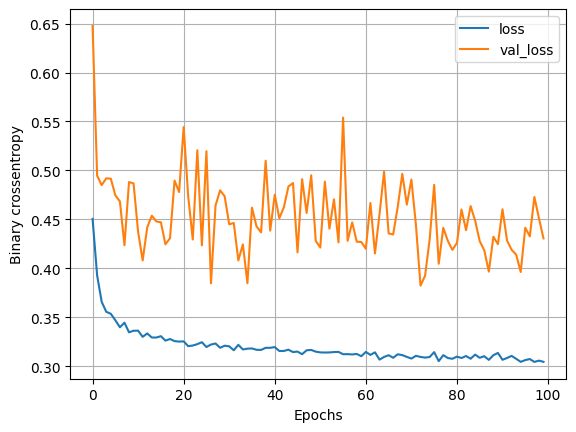

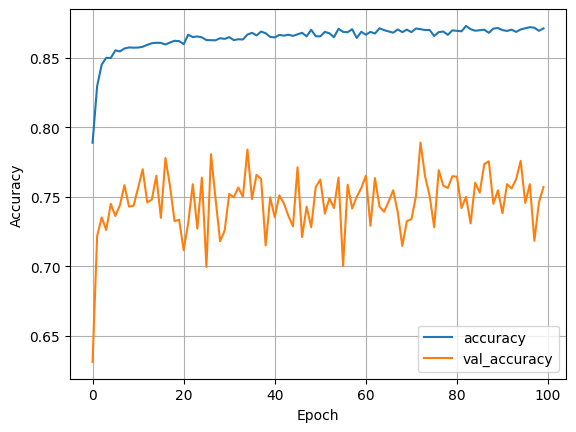

32 nodes, dropout 0.2, lr 0.005, batch size 32


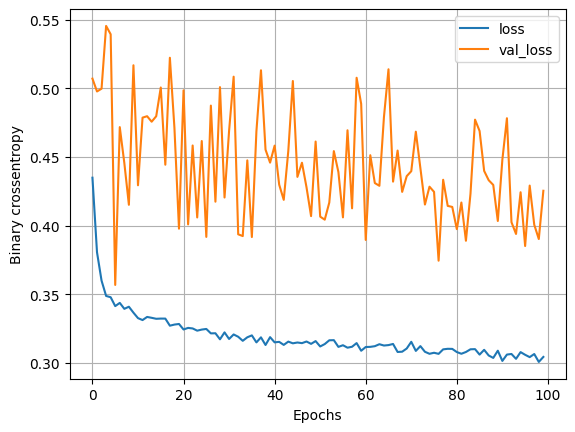

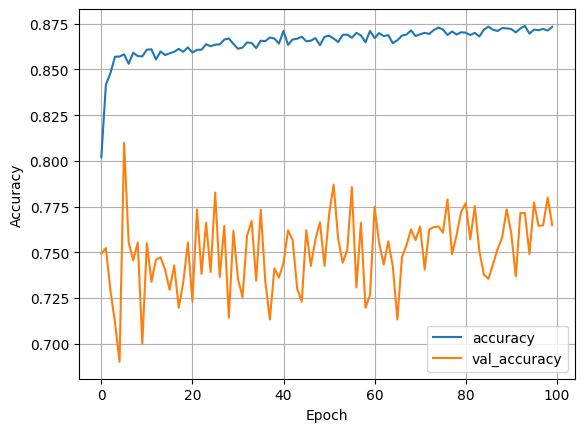

32 nodes, dropout 0.2, lr 0.005, batch size 64


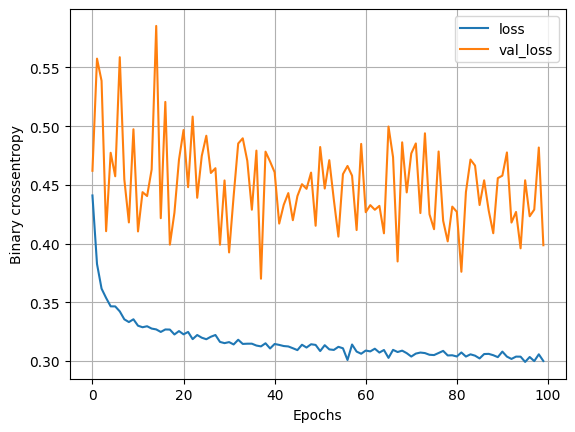

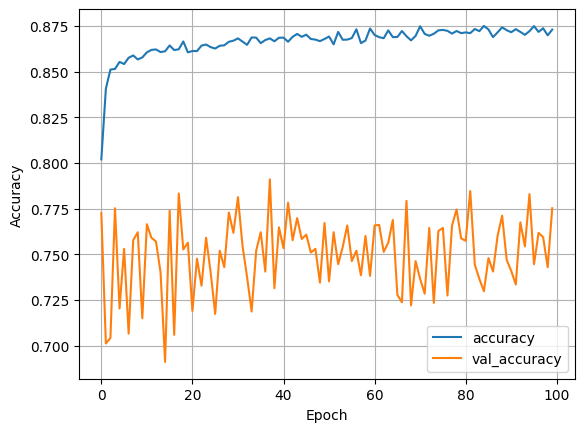

32 nodes, dropout 0.2, lr 0.005, batch size 128


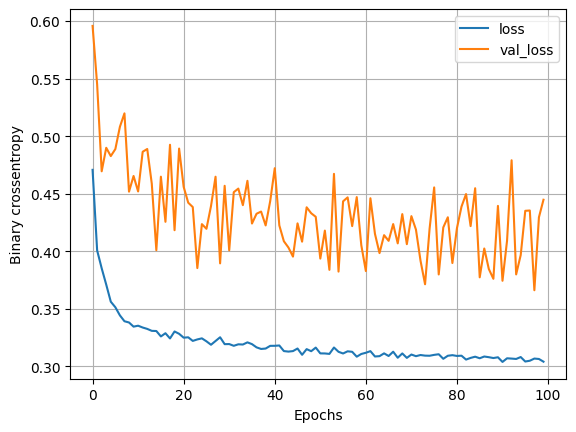

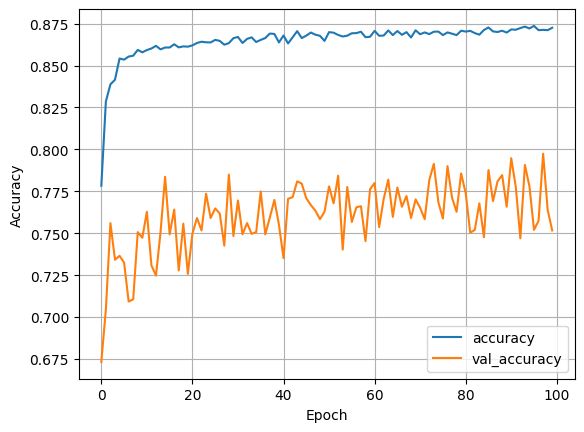

32 nodes, dropout 0.2, lr 0.001, batch size 32


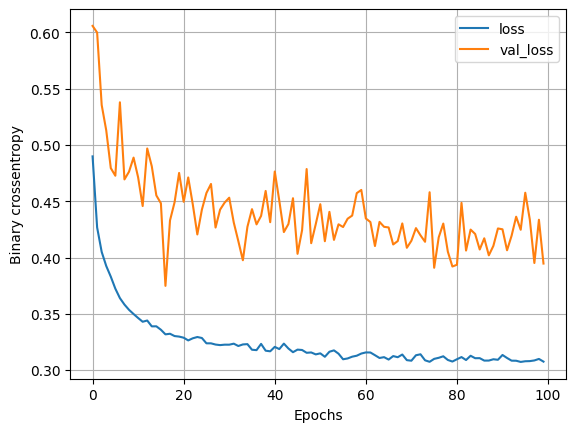

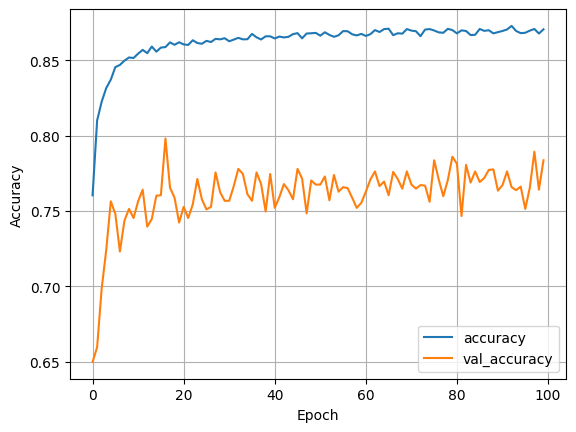

32 nodes, dropout 0.2, lr 0.001, batch size 64


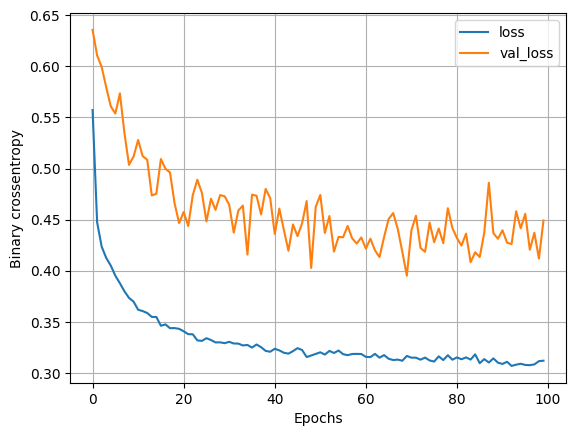

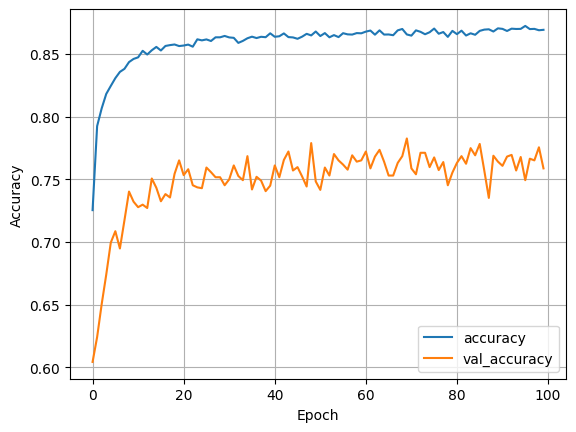

32 nodes, dropout 0.2, lr 0.001, batch size 128


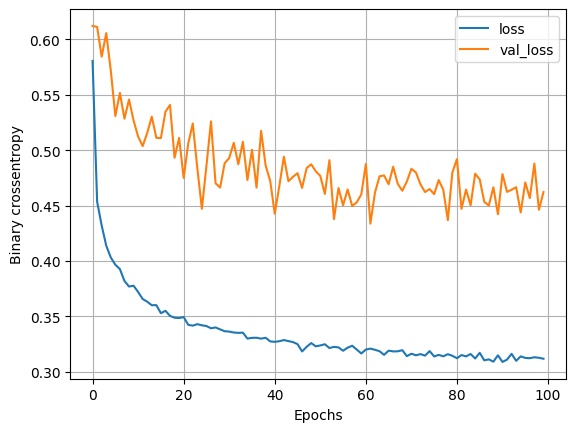

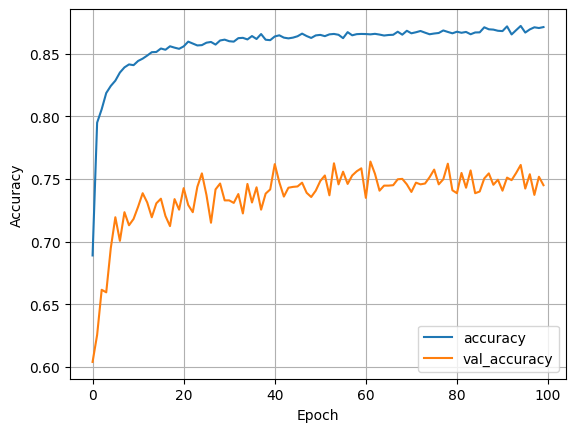

64 nodes, dropout 0, lr 0.01, batch size 32


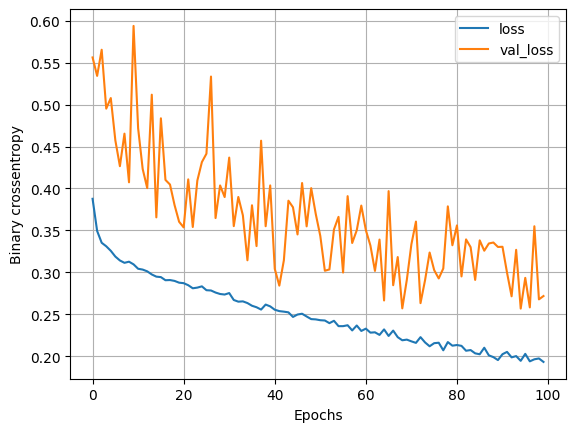

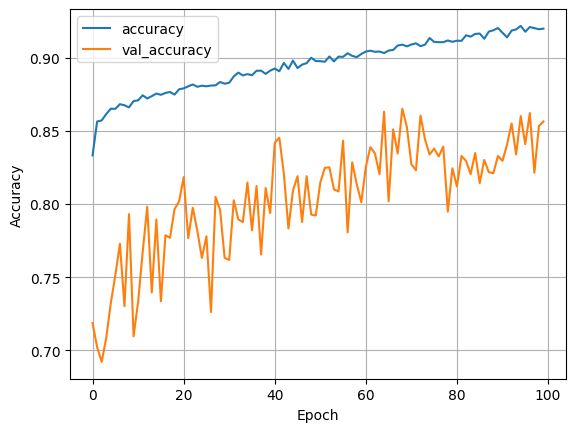

64 nodes, dropout 0, lr 0.01, batch size 64


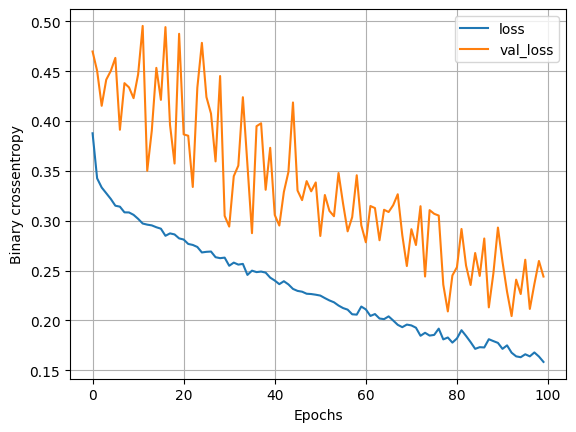

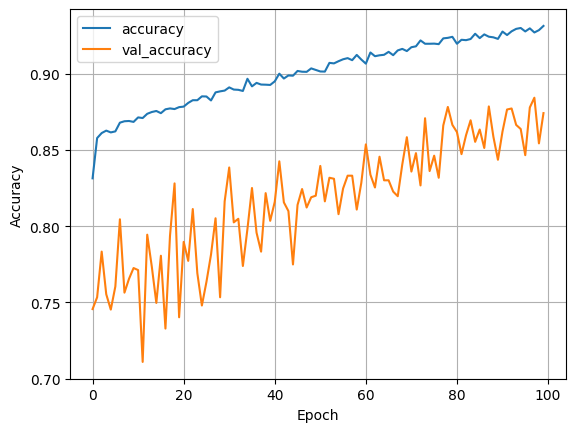

64 nodes, dropout 0, lr 0.01, batch size 128


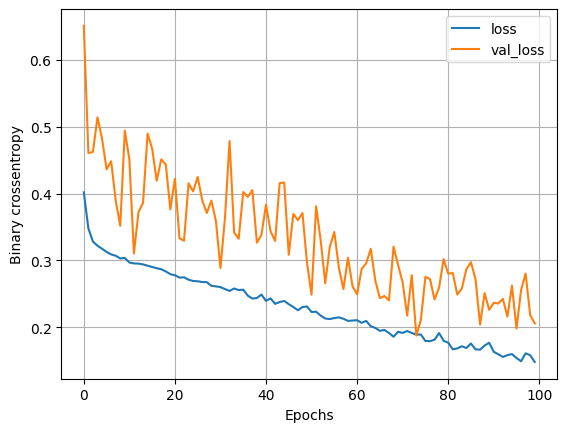

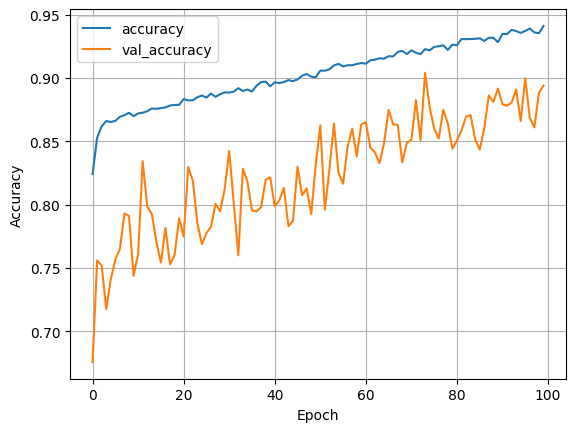

64 nodes, dropout 0, lr 0.005, batch size 32


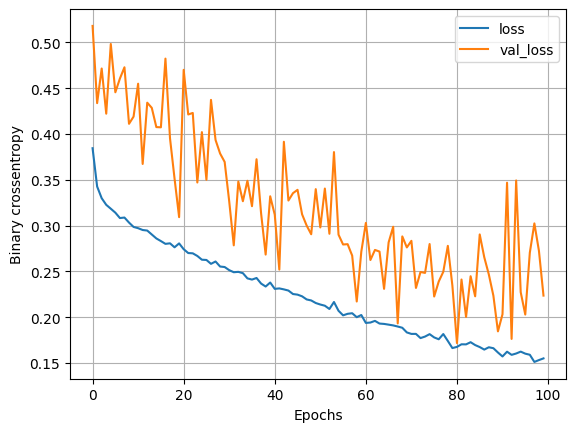

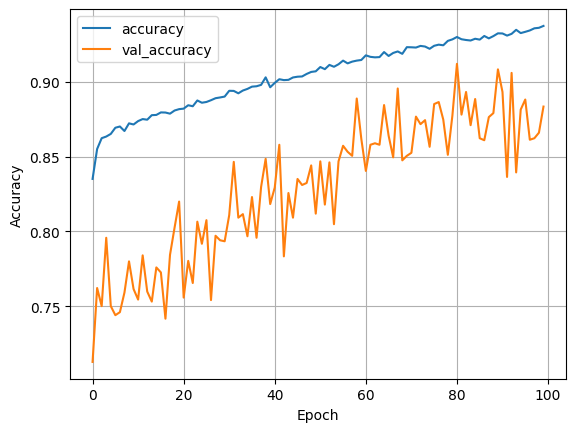

64 nodes, dropout 0, lr 0.005, batch size 64


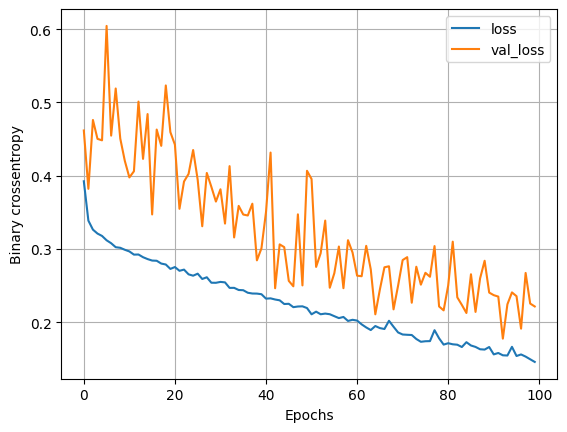

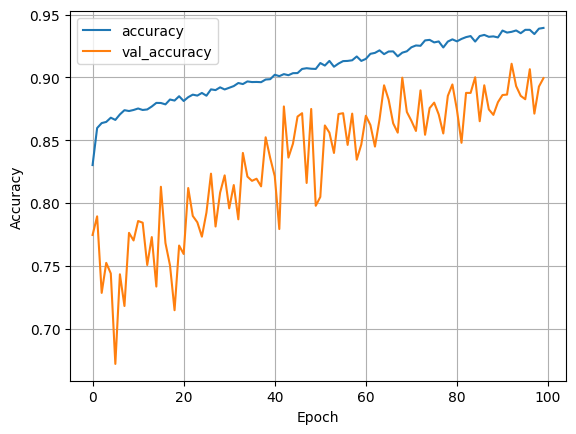

64 nodes, dropout 0, lr 0.005, batch size 128


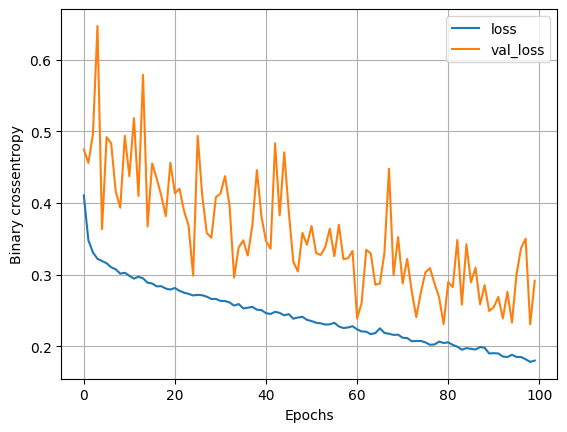

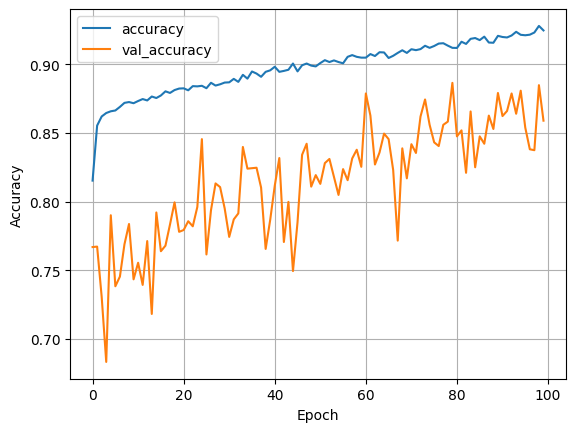

64 nodes, dropout 0, lr 0.001, batch size 32


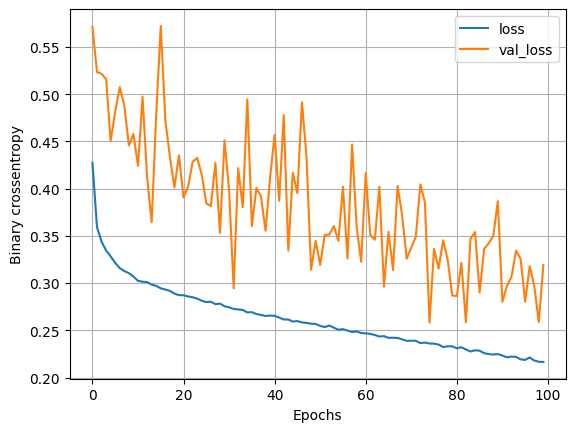

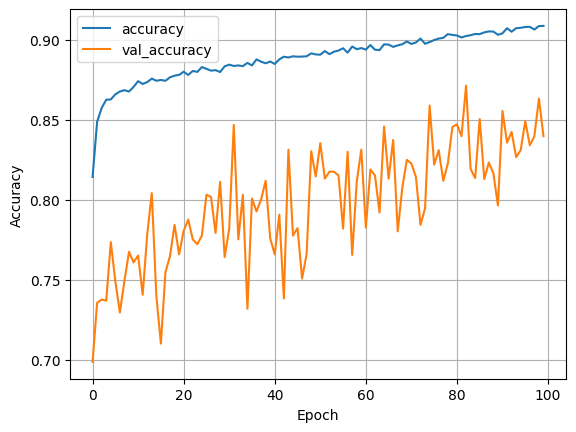

64 nodes, dropout 0, lr 0.001, batch size 64


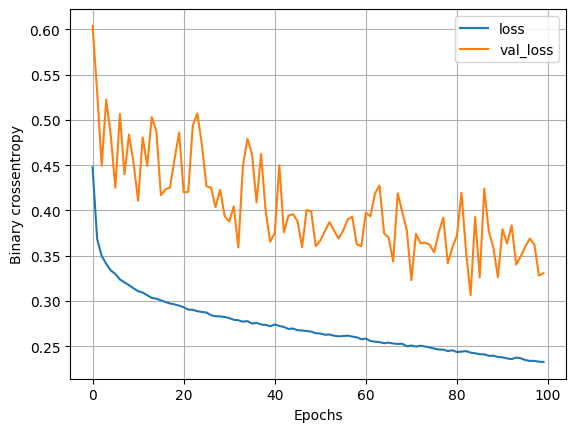

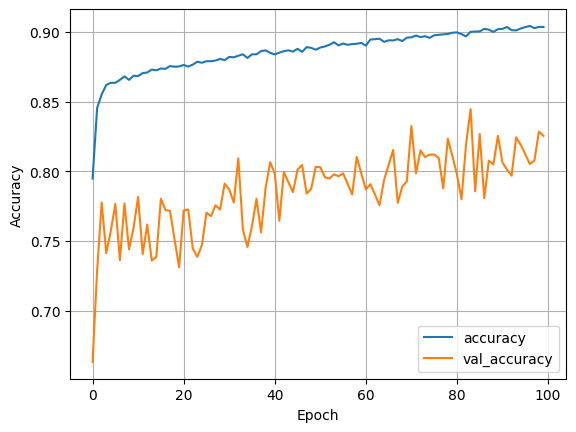

64 nodes, dropout 0, lr 0.001, batch size 128


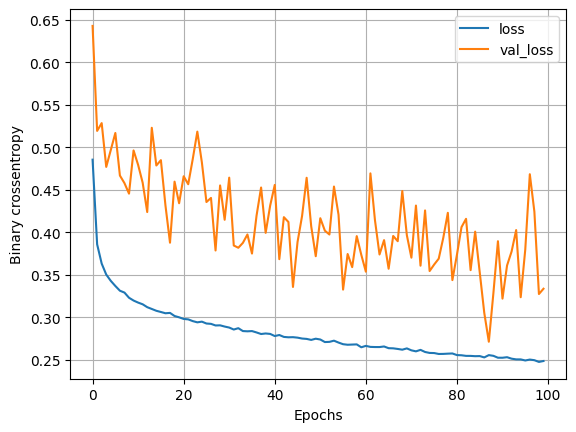

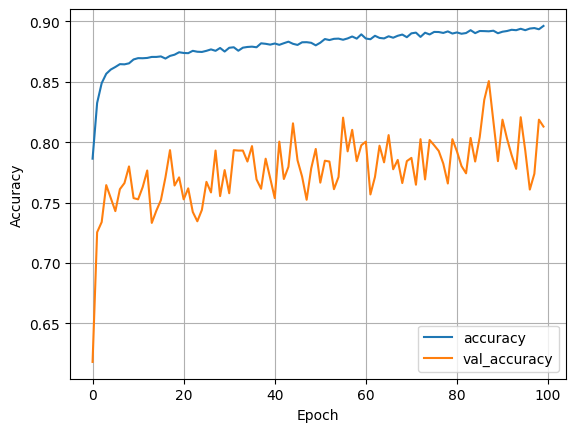

64 nodes, dropout 0.2, lr 0.01, batch size 32


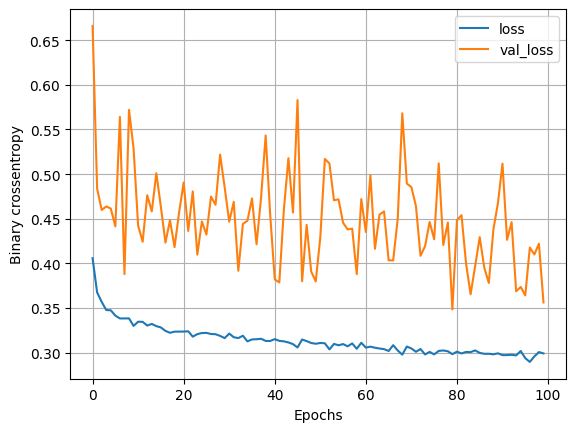

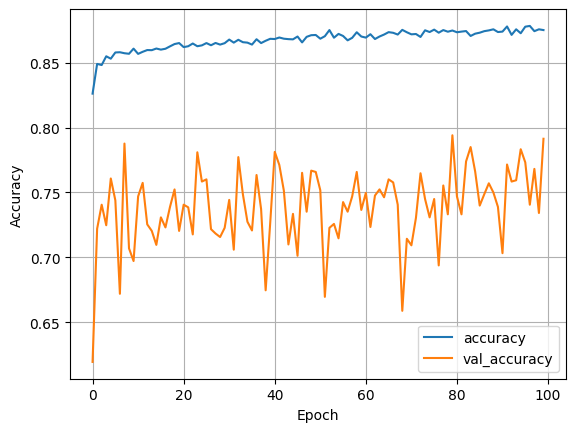

64 nodes, dropout 0.2, lr 0.01, batch size 64


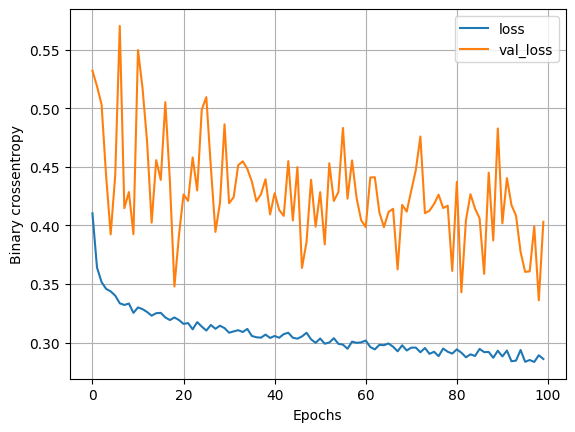

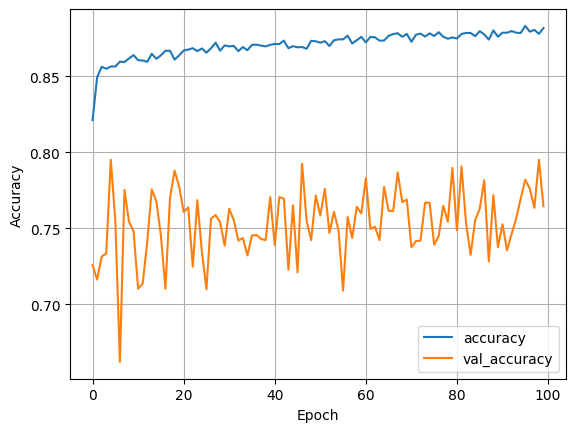

64 nodes, dropout 0.2, lr 0.01, batch size 128


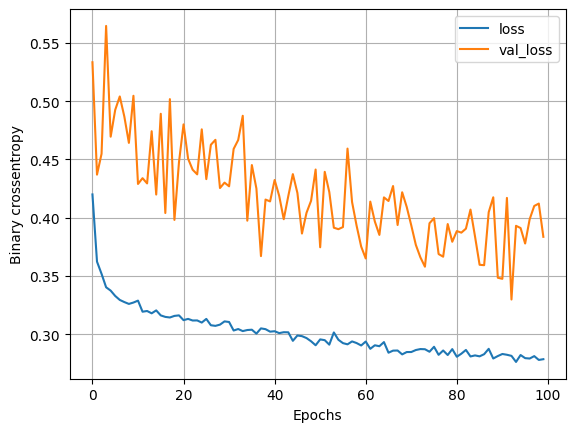

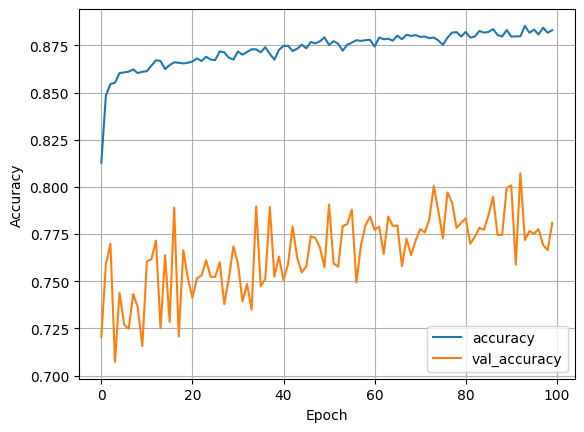

64 nodes, dropout 0.2, lr 0.005, batch size 32


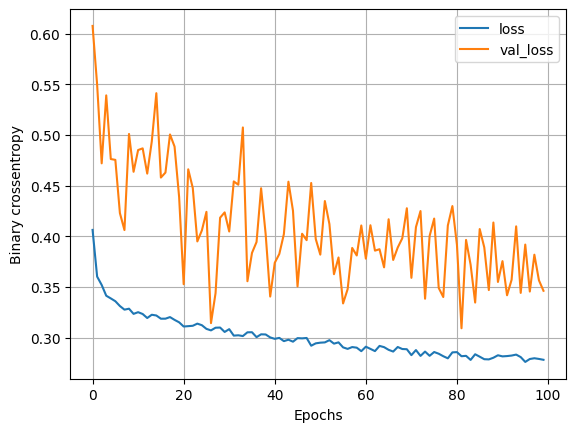

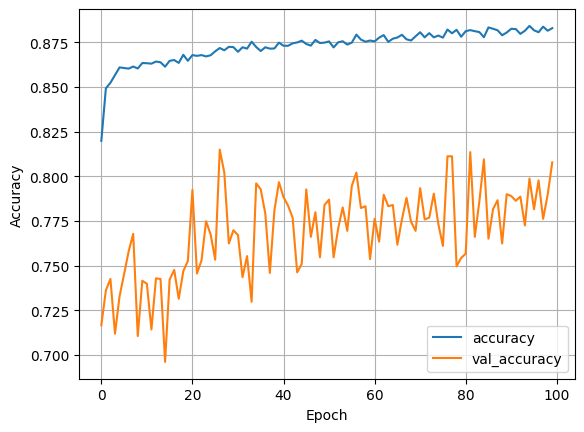

64 nodes, dropout 0.2, lr 0.005, batch size 64


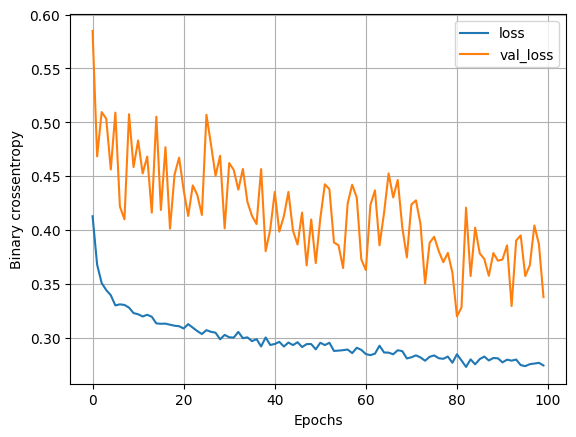

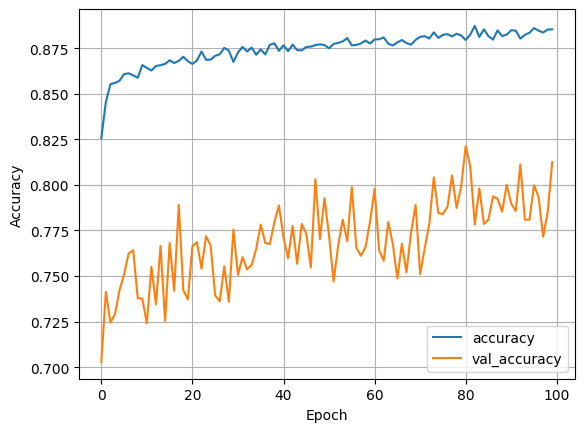

64 nodes, dropout 0.2, lr 0.005, batch size 128


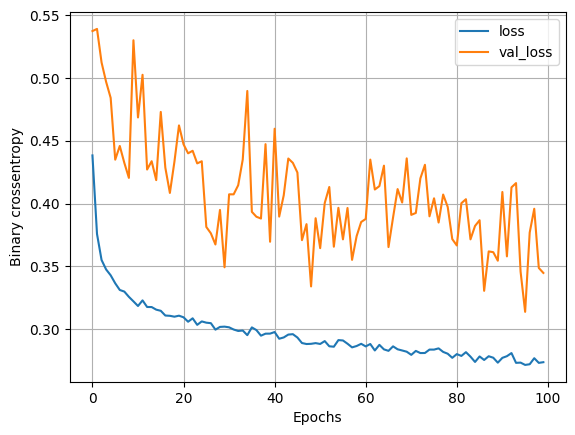

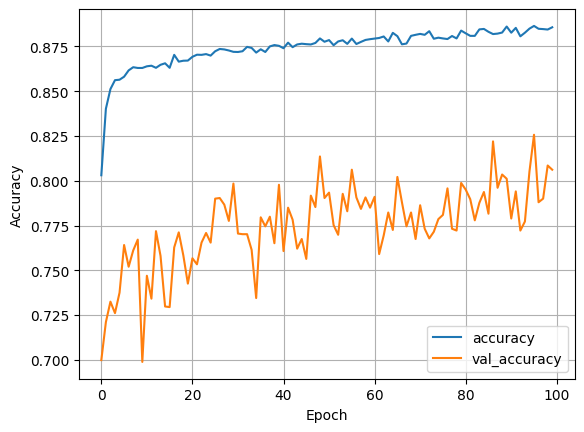

64 nodes, dropout 0.2, lr 0.001, batch size 32


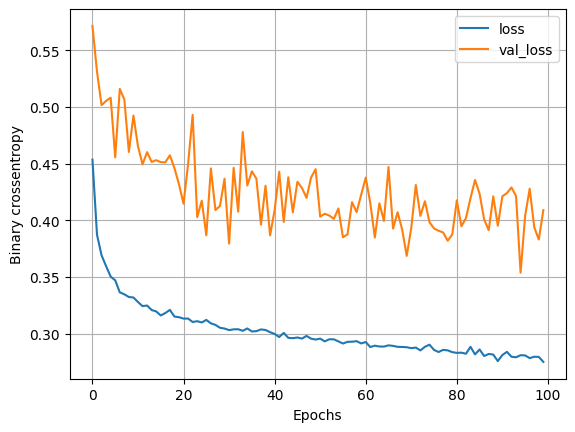

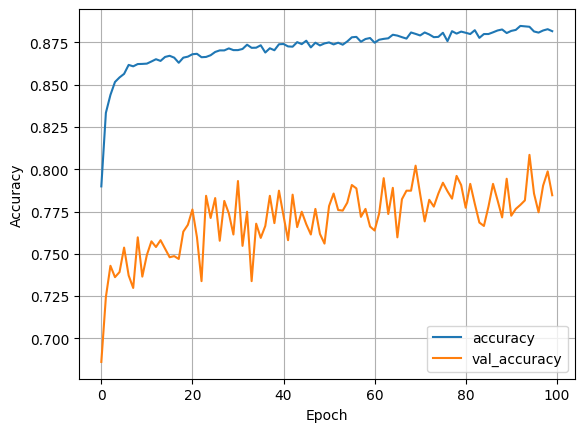

64 nodes, dropout 0.2, lr 0.001, batch size 64


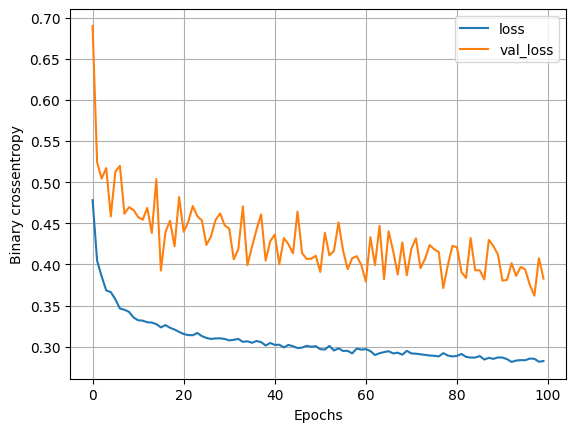

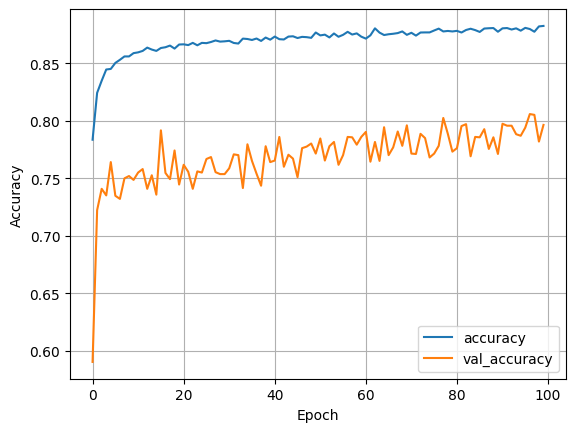

64 nodes, dropout 0.2, lr 0.001, batch size 128


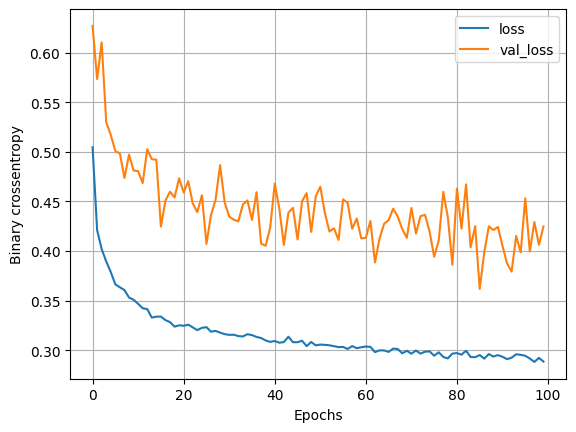

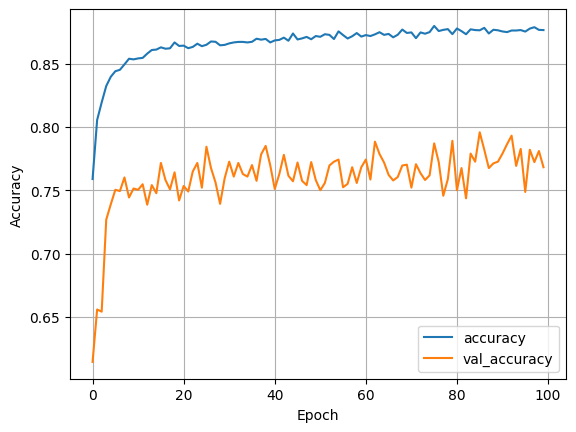

In [32]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_probs in [0, 0.2]:
    for learning_rate in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_probs}, lr {learning_rate}, batch size {batch_size}")
        neural_network, history = train_model(x_train, y_train, num_nodes, dropout_probs, learning_rate, epochs, batch_size)
        plot_loss(history)
        plot_accuracy(history)

        val_loss = neural_network.evaluate(x_val, y_val, verbose=0)[0]  # take only the loss
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = neural_network



#Example model

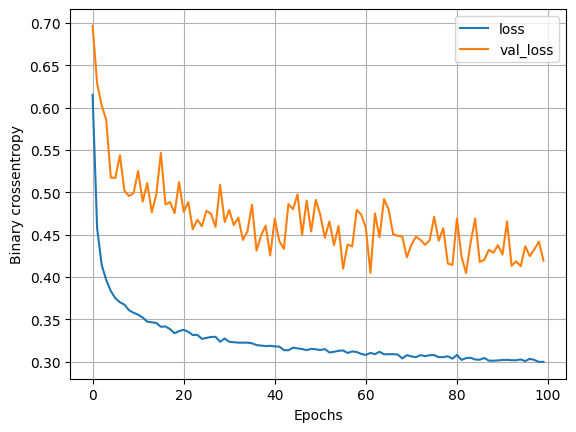

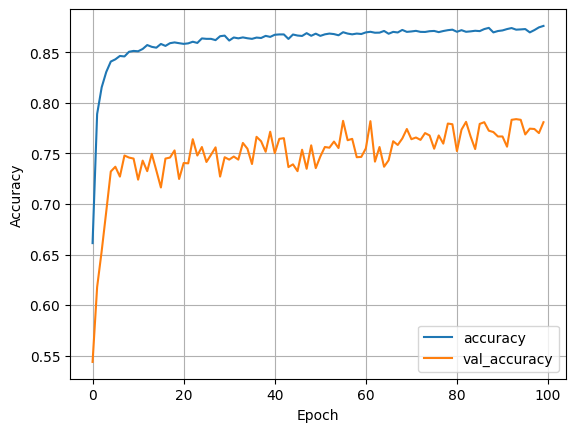

In [34]:
neural_network, history = train_model(x_train, y_train, 32, 0.1, 0.001, 100, 128)
plot_loss(history)
plot_accuracy(history)

In [36]:
predict = neural_network.predict(x_test)
predict = (predict > 0.5).astype(int)
print(classification_report(y_test, predict))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1357
           1       0.87      0.94      0.91      2447

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

